In [121]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patches as ptch
from imblearn.over_sampling import RandomOverSampler

# 1. Pre-proccessing

In [91]:
data = pd.read_csv("neo_v2.csv")
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [92]:
data.shape

(90836, 10)

In [93]:
data.drop(["id", "name", "orbiting_body", "sentry_object"], axis=1, inplace=True)
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


## 1.3 Handle missing values

In [94]:
sip = SimpleImputer(missing_values=np.nan, strategy="median")
data.iloc[:, :-1] = sip.fit_transform(data.iloc[:, :-1].values)

## 1.4 set features and label

In [95]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [96]:
X.shape

(90836, 5)

## 1.5 Label Encoding

In [97]:
lb_encoder = LabelEncoder()
y = lb_encoder.fit_transform(y)

## 1.6 Resampling due to imbalanced dataset

First we check how much data is imbalanced

In [98]:
minority_class_percent = 100 - round(sum(y) / len(y) * 100)
print("Minority class percentage: {}%".format(str(minority_class_percent)))

Majority class percentage: 90%


In [99]:
# over sampling

print(len(X))
random_over_sampler = RandomOverSampler()
X, y = random_over_sampler.fit_resample(X, y)
minority_class_percent = 100 - round(sum(y) / len(y) * 100)
print(len(X))
print("Minority class percentage: {}%".format(str(minority_class_percent)))

90836
Majority class percentage: 50%


## 1.7 Split data sets and Base Accuracy

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
base_line_for_accuracy = 0
counters = collections.Counter(y_test)
labels = list(set(y_test))
if counters[labels[0]] > counters[labels[1]]:
    base_line_for_accuracy = counters[labels[0]] / len(y_test)
else:
    base_line_for_accuracy = counters[labels[1]] / len(y_test)
base_line_for_accuracy = round(base_line_for_accuracy, 3)
print("Base Accuracy: {}".format(str(base_line_for_accuracy)))

Base Accuracy: 0.505


## 1.8 Feature Scaling

In [101]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Logistic Regression Classifying

In [102]:
def run_Logistic_Reg_Classifier(X_train, X_test, y_train, y_test, base_acc):
    lr_classif = LogisticRegression(random_state=0)
    lr_classif.fit(X_train, y_train)
    y_pred_lr_classif = lr_classif.predict(X_test)
    cm_lr_classif = confusion_matrix(y_test, y_pred_lr_classif)
    print("Confusion Matrix")
    print(cm_lr_classif)
    acc_lr_classif = accuracy_score(y_test, y_pred_lr_classif)
    acc_lr_classif = round(acc_lr_classif, 3)
    print()
    print("Accuracy for Logistic Regression Classifier: {}".format(str(acc_lr_classif)))
    print("Base Line Accuracy is: {}".format(str(base_acc)))
    return [y_pred_lr_classif, acc_lr_classif, cm_lr_classif[1][0]]

In [103]:
y_pred_logistic_reg, acc_lr_classif, cm_lr_classif = run_Logistic_Reg_Classifier(X_train, X_test, y_train, y_test, base_line_for_accuracy)

Confusion Matrix
[[12545  3705]
 [ 1191 15358]]

Accuracy for Logistic Regression Classifier: 0.851
Base Line Accuracy is: 0.505


# 3. K-Nearest Neighbors

In [104]:
def run_KNN_Classifier(X_train, X_test, y_train, y_test, base_acc):
    knn_classif = KNeighborsClassifier(n_neighbors=70, metric="minkowski", p=2)
    knn_classif.fit(X_train, y_train)
    y_pred_knn_classif = knn_classif.predict(X_test)
    cm_knn_classif = confusion_matrix(y_test, y_pred_knn_classif)
    print("Confusion Matrix")
    print(cm_knn_classif)
    acc_knn_classif = accuracy_score(y_test, y_pred_knn_classif)
    acc_knn_classif = round(acc_knn_classif, 3)
    print()
    print("Accuracy for KNN Classifier: {}".format(str(acc_knn_classif)))
    print("Base Line Accuracy is: {}".format(str(base_acc)))
    return  [y_pred_knn_classif, acc_knn_classif, cm_knn_classif[1][0]]

In [105]:
y_pred_knn, acc_knn_classif, cm_knn_classif = run_KNN_Classifier(X_train, X_test, y_train, y_test, base_line_for_accuracy)

Confusion Matrix
[[12290  3960]
 [  191 16358]]

Accuracy for KNN Classifier: 0.873
Base Line Accuracy is: 0.505


# 4. SVC

In [106]:
def run_svc_Classifier(X_train, X_test, y_train, y_test, kernel, base_acc):
    svc_classif = SVC(kernel=kernel, random_state=0)
    svc_classif.fit(X_train, y_train)
    y_pred_svc_classif = svc_classif.predict(X_test)
    cm_svc_classif = confusion_matrix(y_test, y_pred_svc_classif)
    print("Confusion Matrix")
    print(cm_svc_classif)
    acc_svc_classif = accuracy_score(y_test, y_pred_svc_classif)
    acc_svc_classif = round(acc_svc_classif, 3)
    print()
    print("Accuracy for Support Vector Classifier with " + kernel +  " kernel: {}".format(str(acc_svc_classif)))
    print("Base Line Accuracy is: {}".format(str(base_acc)))
    return [y_pred_svc_classif, acc_svc_classif, cm_svc_classif[1][0]]

In [107]:
y_pred_linear_svc, acc_svc_linear_classif, cm_svc_classif = run_svc_Classifier(X_train, X_test, y_train, y_test, 'linear', base_line_for_accuracy)

Confusion Matrix
[[11922  4328]
 [  304 16245]]

Accuracy for Support Vector Classifier with linear kernel: 0.859
Base Line Accuracy is: 0.505


# 5. Kernel SVC

In [108]:
y_pred_kernel_svc, acc_svc_kernel_classif, cm_kernel_svc_classif = run_svc_Classifier(X_train, X_test, y_train, y_test, 'rbf', base_line_for_accuracy)

Confusion Matrix
[[12065  4185]
 [   93 16456]]

Accuracy for Support Vector Classifier with rbf kernel: 0.87
Base Line Accuracy is: 0.505


# 6. Naive Bayes

In [109]:
def run_naive_bayes(X_train, X_test, y_train, y_test, base_acc):
    nb_classif = GaussianNB()
    nb_classif.fit(X_train, y_train)
    y_nb_pred = nb_classif.predict(X_test)
    cm_nb_classif = confusion_matrix(y_test, y_nb_pred)
    print("Confusion Matrix")
    print(cm_nb_classif)
    acc_nb_classif = accuracy_score(y_test, y_nb_pred)
    acc_nb_classif = round(acc_nb_classif, 3)
    print()
    print("Accuracy for Naive Bayes Classifier: {}".format(str(acc_nb_classif)))
    print("Base Line Accuracy is: {}".format(str(base_acc)))
    return [y_nb_pred, acc_nb_classif, cm_nb_classif[1][0]]

In [110]:
y_pred_naive_bayes, acc_nb_classif, cm_nb_classif = run_naive_bayes(X_train, X_test, y_train, y_test, base_line_for_accuracy)

Confusion Matrix
[[12480  3770]
 [ 1740 14809]]

Accuracy for Naive Bayes Classifier: 0.832
Base Line Accuracy is: 0.505


# 7. Random Forest

In [111]:
def run_random_forest(X_train, X_test, y_train, y_test, base_acc):
    rf_classif = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    rf_classif.fit(X_train, y_train)
    y_pred_rf = rf_classif.predict(X_test)
    cm_rf_classif = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix")
    print(cm_rf_classif)
    acc_rf_classif = accuracy_score(y_test, y_pred_rf)
    acc_rf_classif = round(acc_rf_classif, 3)
    print()
    print("Accuracy for Random Forest Classifier: {}".format(str(acc_rf_classif)))
    print("Base Line Accuracy is: {}".format(str(base_acc)))
    return [y_pred_rf, acc_rf_classif, cm_rf_classif[1][0]]

In [112]:
y_pred_random_forest, acc_rf_classif, cm_rf_classif = run_random_forest(X_train, X_test, y_train, y_test, base_line_for_accuracy)

Confusion Matrix
[[15232  1018]
 [    4 16545]]

Accuracy for Random Forest Classifier: 0.969
Base Line Accuracy is: 0.505


# 8. Accuracy comparison

In [113]:
print("Base Line Accuracy is: {}".format(str(base_line_for_accuracy)))
print("Accuracy for Logistic Regression Classifier: {}".format(str(acc_lr_classif)))
print("Accuracy for KNN Classifier: {}".format(str(acc_knn_classif)))
print("Accuracy for Support Vector Classifier with linear kernel: {}".format(str(acc_svc_linear_classif)))
print("Accuracy for Support Vector Classifier with rbf kernel: {}".format(str(acc_svc_kernel_classif)))
print("Accuracy for Naive Bayes Classifier: {}".format(str(acc_nb_classif)))
print("Accuracy for Random Forest Classifier: {}".format(str(acc_rf_classif)))

Base Line Accuracy is: 0.505
Accuracy for Logistic Regression Classifier: 0.851
Accuracy for KNN Classifier: 0.873
Accuracy for Support Vector Classifier with linear kernel: 0.859
Accuracy for Support Vector Classifier with rbf kernel: 0.87
Accuracy for Naive Bayes Classifier: 0.832
Accuracy for Random Forest Classifier: 0.969


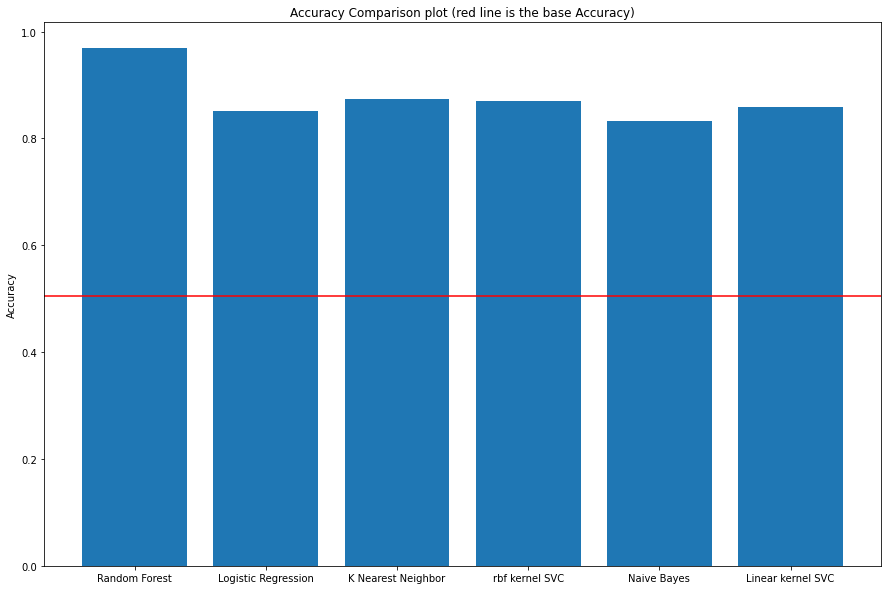

In [114]:
plt.figure(figsize = (15, 10))
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison plot (red line is the base Accuracy)")

x_axis = ["Random Forest", "Logistic Regression", "K Nearest Neighbor", "rbf kernel SVC", "Naive Bayes", "Linear kernel SVC"]
y_axis = [acc_rf_classif, acc_lr_classif, acc_knn_classif, acc_svc_kernel_classif, acc_nb_classif, acc_svc_linear_classif]

base_y = [base_line_for_accuracy] * len(x_axis)

# plt.plot(x_axis, base_y, c='r')
plt.axhline(y=base_line_for_accuracy, color="red")
plt.bar(x_axis, y_axis)
plt.show()

## 8.1 False Negative Comparison

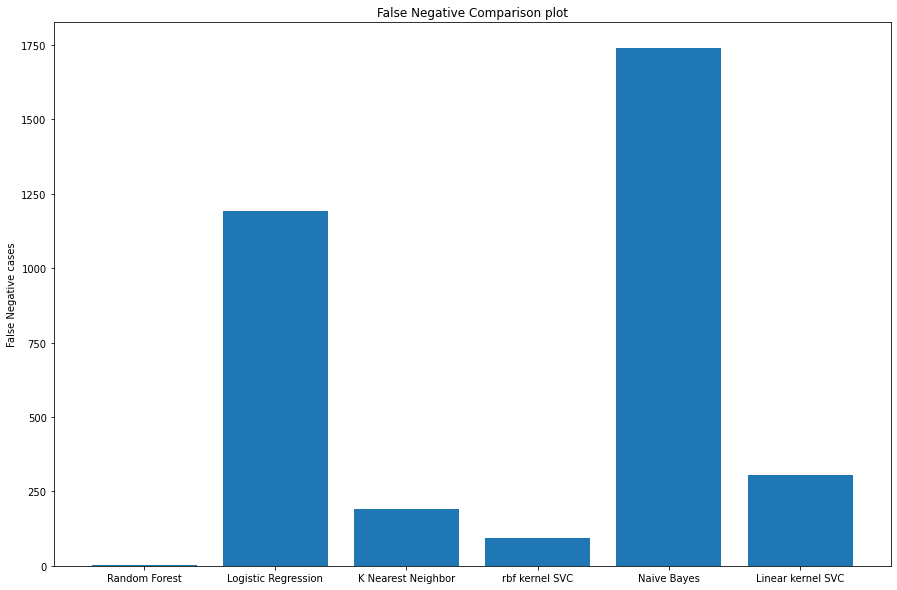

In [115]:
plt.figure(figsize = (15, 10))
plt.ylabel("False Negative cases")
plt.title("False Negative Comparison plot")

x_axis = ["Random Forest", "Logistic Regression", "K Nearest Neighbor", "rbf kernel SVC", "Naive Bayes", "Linear kernel SVC"]
y_axis = [cm_rf_classif, cm_lr_classif, cm_knn_classif, cm_kernel_svc_classif, cm_nb_classif, cm_svc_classif]
plt.bar(x_axis, y_axis)
plt.show()

# 9. Accuracy Evaluation with CAP

In [116]:
total_classes = len(y_test)
first_class_count = np.sum(y_test)
second_class_count = total_classes - first_class_count

In [117]:
def make_y_axis_values(y_pred, y_test):
    model_y = [y for _, y in sorted(zip(y_pred, y_test), reverse=True)]
    return np.append([0], np.cumsum(model_y))

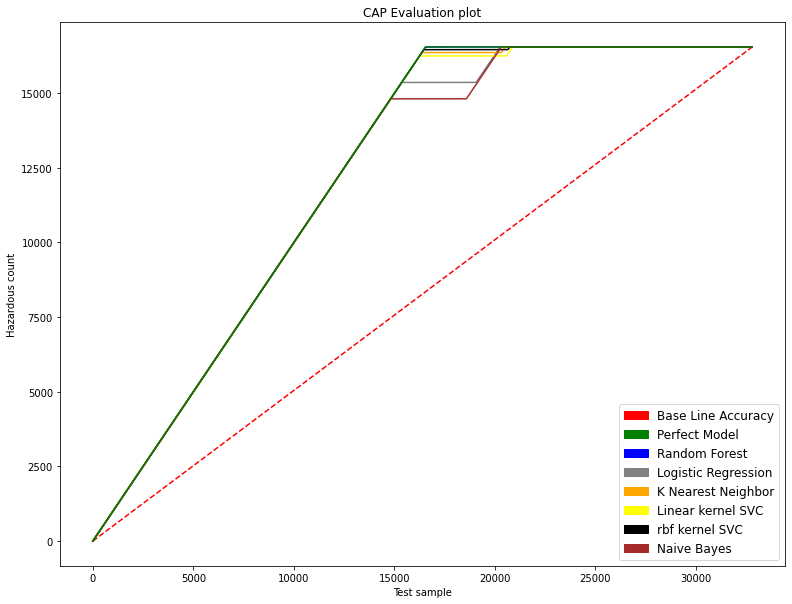

In [118]:
plt.figure(figsize = (13, 10))
plt.ylabel("Hazardous count")
plt.xlabel("Test sample")
plt.title("CAP Evaluation plot")
red_patch= ptch.Patch(color="red", label="Random Model")
green_patch= ptch.Patch(color="green", label="Perfect Model")
x_axis = [x for x in range(total_classes + 1)]

red_patch= ptch.Patch(color="red", label="Base Line Accuracy")
blue_patch= ptch.Patch(color="blue", label="Random Forest")
gray_patch= ptch.Patch(color="gray", label="Logistic Regression")
orange_patch= ptch.Patch(color="orange", label="K Nearest Neighbor")
black_patch= ptch.Patch(color="black", label="rbf kernel SVC")
brown_patch= ptch.Patch(color="brown", label="Naive Bayes")
yellow_patch= ptch.Patch(color="yellow", label="Linear kernel SVC")

rf_y = make_y_axis_values(y_pred_random_forest, y_test)
logistic_reg_y = make_y_axis_values(y_pred_logistic_reg, y_test)
knn_y = make_y_axis_values(y_pred_knn, y_test)
svc_y = make_y_axis_values(y_pred_linear_svc, y_test)
kernel_svc_y = make_y_axis_values(y_pred_kernel_svc, y_test)
nb_y = make_y_axis_values(y_pred_naive_bayes, y_test)

half_x = int((50*total_classes / 100))

plt.legend(handles=[red_patch, green_patch, blue_patch, gray_patch, orange_patch, yellow_patch, black_patch, brown_patch], loc=4, prop={'size': 12})
plt.plot([0, total_classes], [0, first_class_count], c='r', linestyle='--')
plt.plot(x_axis, rf_y, c='blue')
plt.plot(x_axis, logistic_reg_y, c='gray')
plt.plot(x_axis, knn_y, c='orange')
plt.plot(x_axis, svc_y, c='yellow')
plt.plot(x_axis, kernel_svc_y, c='black')
plt.plot(x_axis, nb_y, c='brown')
plt.plot([0, first_class_count, total_classes], [0, first_class_count, first_class_count], c='green')
plt.show()

In [120]:
print("CAP project on 50% for Naive Bayes: {}".format(str(nb_y[half_x] * 100 / max(nb_y))))
print("CAP project on 50% for Logistic Regression: {}".format(str(logistic_reg_y[half_x] * 100 / max(logistic_reg_y))))
print("CAP project on 50% for K Nearest Neighbor: {}".format(str(knn_y[half_x] * 100 / max(knn_y))))
print("CAP project on 50% for Linear kernel SVC: {}".format(str(svc_y[half_x] * 100 / max(svc_y))))
print("CAP project on 50% for rbf kernel SVC: {}".format(str(kernel_svc_y[half_x] * 100 / max(kernel_svc_y))))
print("CAP project on 50% for Random Forest: {}".format(str(rf_y[half_x] * 100 / max(rf_y))))

CAP project on 50% for Naive Bayes: 89.4857695329023
CAP project on 50% for Logistic Regression: 92.80319052510725
CAP project on 50% for K Nearest Neighbor: 98.84585171309445
CAP project on 50% for Linear kernel SVC: 98.1630309988519
CAP project on 50% for rbf kernel SVC: 99.09360082180193
CAP project on 50% for Random Forest: 99.09360082180193
